In [29]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o 

  def sigmoid(self, s):
    # activation function 
    return 1/(1+np.exp(-s))

NN = Neural_Network()

#defining our output 
o = NN.forward(X)

print "Predicted Output: \n" + str(o) 
print "Actual Output: \n" + str(y) 

Predicted Output: 
[[0.44546438]
 [0.44420323]
 [0.42966785]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


In [23]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o 

  def sigmoid(self, s):
    # activation function 
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propgate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train (self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)
    
lossHistory = []
NN = Neural_Network()
print "Input: \n" + str(X) 
print "Actual Output: \n" + str(y)  
print "Predicted Output: \n" + str(NN.forward(X)) 

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.61627345]
 [0.6171179 ]
 [0.66033032]]


In [24]:
for i in xrange(1000): # trains the NN 1,000 times
  loss = np.mean(np.square(y - NN.forward(X))) 
  lossHistory.append(loss)
  print "Loss: \n" + str(loss) # mean sum squared loss
  print "\n"
  NN.train(X, y)

Loss: 
0.0679965643889069


Loss: 
0.055348137064429474


Loss: 
0.04542303510520281


Loss: 
0.03759709311131517


Loss: 
0.031387911330650664


Loss: 
0.026426205913521256


Loss: 
0.022430805460921636


Loss: 
0.019188009567139366


Loss: 
0.016535214103415994


Loss: 
0.014348278019390683


Loss: 
0.012531954422796929


Loss: 
0.011012722966222825


Loss: 
0.009733451525655972


Loss: 
0.008649427236488713


Loss: 
0.00772540236438948


Loss: 
0.0069333886688580084


Loss: 
0.006251003188124618


Loss: 
0.0056602208379985435


Loss: 
0.005146428101323453


Loss: 
0.004697700547018199


Loss: 
0.004304247616622707


Loss: 
0.00395798313190934


Loss: 
0.003652190872623007


Loss: 
0.003381262496255004


Loss: 
0.003140490852906704


Loss: 
0.002925905985106812


Loss: 
0.0027341442229095177


Loss: 
0.0025623430952151104


Loss: 
0.002408056498817895


Loss: 
0.002269185855246011


Loss: 
0.002143923956083233


Loss: 
0.0020307089328319935


Loss: 
0.0019281863477066694


Loss: 
0.0

Loss: 
0.0005273313507596049


Loss: 
0.0005270200780432074


Loss: 
0.0005267090986194249


Loss: 
0.000526398412121281


Loss: 
0.0005260880181823382


Loss: 
0.0005257779164366542


Loss: 
0.0005254681065188334


Loss: 
0.0005251585880639698


Loss: 
0.0005248493607076849


Loss: 
0.0005245404240861132


Loss: 
0.0005242317778358996


Loss: 
0.0005239234215942025


Loss: 
0.0005236153549986914


Loss: 
0.0005233075776875514


Loss: 
0.0005230000892994722


Loss: 
0.0005226928894736567


Loss: 
0.0005223859778498235


Loss: 
0.000522079354068183


Loss: 
0.0005217730177694626


Loss: 
0.0005214669685948966


Loss: 
0.000521161206186226


Loss: 
0.0005208557301856884


Loss: 
0.0005205505402360433


Loss: 
0.0005202456359805332


Loss: 
0.0005199410170629217


Loss: 
0.0005196366831274553


Loss: 
0.0005193326338188989


Loss: 
0.0005190288687825087


Loss: 
0.0005187253876640478


Loss: 
0.0005184221901097652


Loss: 
0.0005181192757664267


Loss: 
0.0005178166442812879


Loss: 
0.00

In [25]:
print(loss)

0.0004279033296990923


In [26]:
import matplotlib.pyplot as plt
print(lossHistory)

[0.0679965643889069, 0.055348137064429474, 0.04542303510520281, 0.03759709311131517, 0.031387911330650664, 0.026426205913521256, 0.022430805460921636, 0.019188009567139366, 0.016535214103415994, 0.014348278019390683, 0.012531954422796929, 0.011012722966222825, 0.009733451525655972, 0.008649427236488713, 0.00772540236438948, 0.0069333886688580084, 0.006251003188124618, 0.0056602208379985435, 0.005146428101323453, 0.004697700547018199, 0.004304247616622707, 0.00395798313190934, 0.003652190872623007, 0.003381262496255004, 0.003140490852906704, 0.002925905985106812, 0.0027341442229095177, 0.0025623430952151104, 0.002408056498817895, 0.002269185855246011, 0.002143923956083233, 0.0020307089328319935, 0.0019281863477066694, 0.0018351778311101073, 0.0017506550223779507, 0.001673717826663784, 0.0016035762004271566, 0.001539534834216575, 0.0014809802243391128, 0.001427369722155948, 0.0013782222268936082, 0.0013331102494095089, 0.0012916531236673264, 0.0012535111823623582, 0.001218380745201915, 0

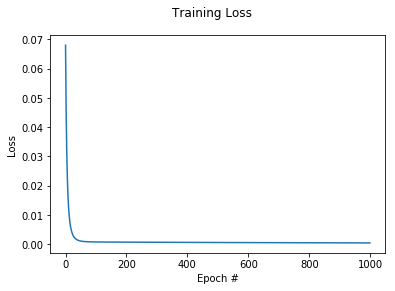

In [27]:
fig = plt.figure()
plt.plot(np.arange(0, 1000), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()